In [25]:
#Assignment #4
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
import datetime
import urllib
import zipfile
import scipy.stats 
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [26]:
#borrowed this code, download and unzip
def getunzipped(theurl, thedir):
  name = os.path.join(thedir, 'temp.zip')
  try:
    name, hdrs = urllib.urlretrieve(theurl, name)
  except IOError, e:
    print "Can't retrieve %r to %r: %s" % (theurl, thedir, e)
    return
  try:
    z = zipfile.ZipFile(name)
  except zipfile.error, e:
    print "Bad zipfile (from %r): %s" % (theurl, e)
    return
  for n in z.namelist():
    dest = os.path.join(thedir, n)
    destdir = os.path.dirname(dest)
    if not os.path.isdir(destdir):
      os.makedirs(destdir)
    data = z.read(n)
    f = open(dest, 'w')
    f.write(data)
    f.close()
  z.close()
  os.unlink(name)
    
    

In [27]:
if os.path.isfile('201507-citibike-tripdata.csv') is False:
    getunzipped('https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip',os.getcwd())
df_S = pd.read_csv('201507-citibike-tripdata.csv')

In [28]:
if os.path.isfile('201501-citibike-tripdata.csv') is False:
    getunzipped('https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip',os.getcwd())
df_W = pd.read_csv('201501-citibike-tripdata.csv')

In [29]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

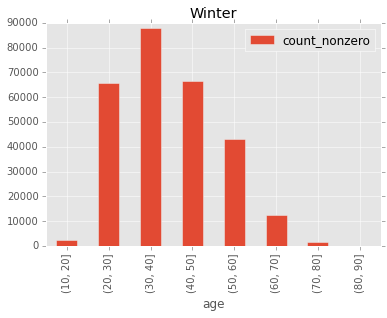

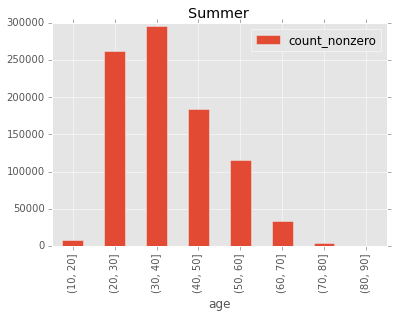

In [30]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

###I conducted KS Tests along with Anderson tests of normal and exponential distributions.

In [31]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')

print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to exponential 

ksW=scipy.stats.kstest(W_age_dist, 'expon')
ksS=scipy.stats.kstest(S_age_dist, 'expon')
print "KS Test: winter, exponential fit", ksW
print "KS Tests: summer, exponential fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
KS Test: winter, exponential fit (1.0, 0.0)
KS Tests: summer, exponential fit (1.0, 0.0)


##These tests show KS stats of 1 with p-values of zero. These tests indicate that the given distribution is different from normal and exponential distributions.

In [32]:
adW = scipy.stats.anderson(W_age_dist['count_nonzero'], 'norm')
adS = scipy.stats.anderson(S_age_dist['count_nonzero'], 'norm')
print "Winter: Anderson Statistic, normal fit: %f, critical value at p=0.05 : %f" %(adW[0],adW[1][2])
print "Summer: Anderson Statistic, normal fit: %f, critical value at p=0.05 : %f" %(adS[0],adS[1][2])


Winter: Anderson Statistic, normal fit: 0.517847, critical value at p=0.05 : 0.709000
Summer: Anderson Statistic, normal fit: 0.505776, critical value at p=0.05 : 0.709000


###The Anderson tests show test statistics below critical values at alps of 0.05, suggesting that we cannot reject the null hypothesis that the distribution is pulled from a gaussian distribution.

In [33]:
adW = scipy.stats.anderson(W_age_dist['count_nonzero'], 'expon')
adS = scipy.stats.anderson(S_age_dist['count_nonzero'], 'expon')
print "Winter: Anderson Statistic, exponential fit: %f, critical value at p=0.05 : %f" %(adW[0],adW[1][2])
print "Summer: Anderson Statistic,exponential fit: %f, critical value at p=0.05 : %f" %(adS[0],adS[1][2])


Winter: Anderson Statistic, exponential fit: 1.598157, critical value at p=0.05 : 1.247000
Summer: Anderson Statistic,exponential fit: 1.640234, critical value at p=0.05 : 1.247000


##The Anderson tests show test statistics above critical values at alps of 0.05, suggesting that we can reject the null hypothesis and state that the experimental distribution *is not* from an exponential distribution.

In [48]:
#Extra credit
lats = df_S['start station latitude']
cutoff = np.median(lats)

In [52]:
#df is the dataframe where the content of the csv file is stored
df_U = df_S[df_S['start station latitude']> cutoff]
df_D = df_S[df_S['start station latitude']< cutoff]

##I calculated a midpoint between 'uptown' and 'downtown' by taking the median latitude as a cutoff. I plan to assess a normal fit w/the KS test.

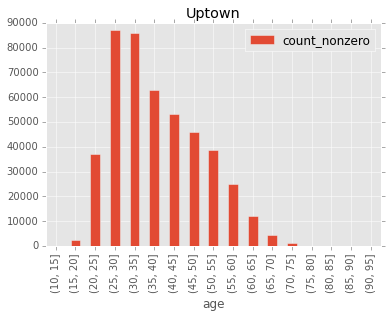

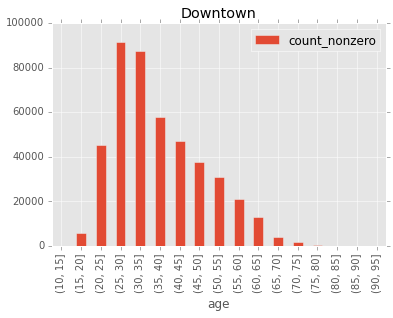

In [56]:
bins = np.arange(10, 99, 5)
df_U.age.groupby(pd.cut(df_U.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Uptown")
U_age_dist = df_U.age.groupby(pd.cut(df_U.age, bins)).agg([count_nonzero])
df_D.age.groupby(pd.cut(df_D.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Downtown")
D_age_dist = df_D.age.groupby(pd.cut(df_D.age, bins)).agg([count_nonzero])

In [77]:
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

uptownmean=U_age_dist['age'].mean()
uptownstd=U_age_dist['age'].var()
downtownmean=df_D['age'].mean()
downtownstd=df_D['age'].var()



KeyError: 'age'

In [78]:
#compare to normal

ksU=scipy.stats.kstest(scale(U_age_dist), 'norm')
#ksU=scipy.stats.kstest(U_age_dist, mynorm, args=(uptownmean,uptownstd))
ksD=scipy.stats.kstest(D_age_dist, 'norm')

print "Uptown, normal fit", ksW
print "Downtown, normal fit", ksS


NameError: name 'scale' is not defined